                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.647327    301.134829
std       19.602454    14210.859152    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224655    202.000000
50%       52.000000    25538.069380    302.000000
75%       68.000000    37820.508432    401.000000
max       89.000000    52764.276740    500.000000


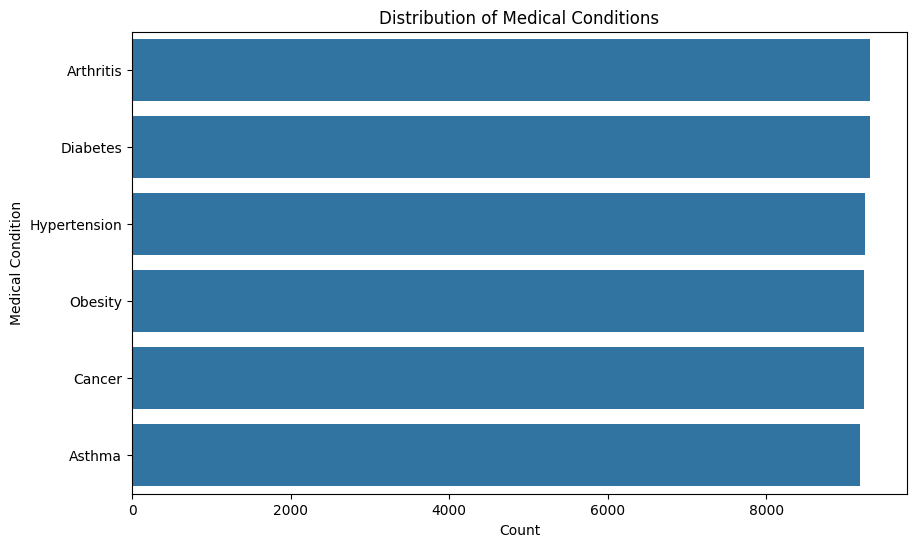

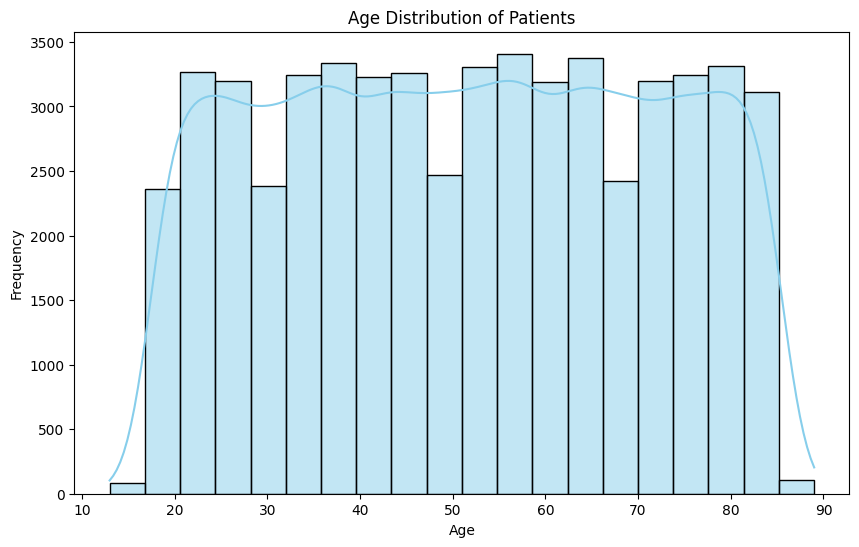

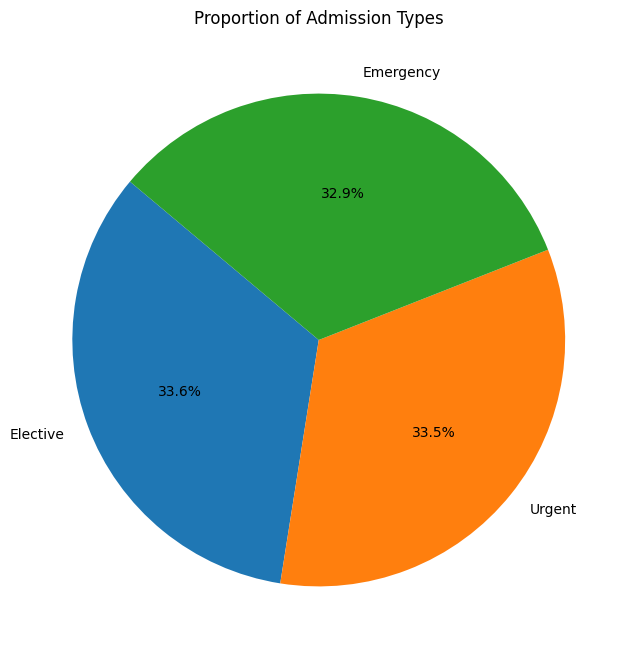

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('healthcare_dataset.csv')

# Summary statistics
print(df.describe())

# Distribution of Medical Conditions
plt.figure(figsize=(10, 6))
sns.countplot(y='Medical Condition', data=df, order=df['Medical Condition'].value_counts().index)
plt.title('Distribution of Medical Conditions')
plt.xlabel('Count')
plt.ylabel('Medical Condition')
plt.show()

# Histogram for Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Pie chart for Admission Type
admission_type_counts = df['Admission Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(admission_type_counts, labels=admission_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Admission Types')
plt.show()


<ipython-input-5-77a122ac8e4c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Medical Condition', y='Billing Amount', data=avg_billing_condition, palette='coolwarm')


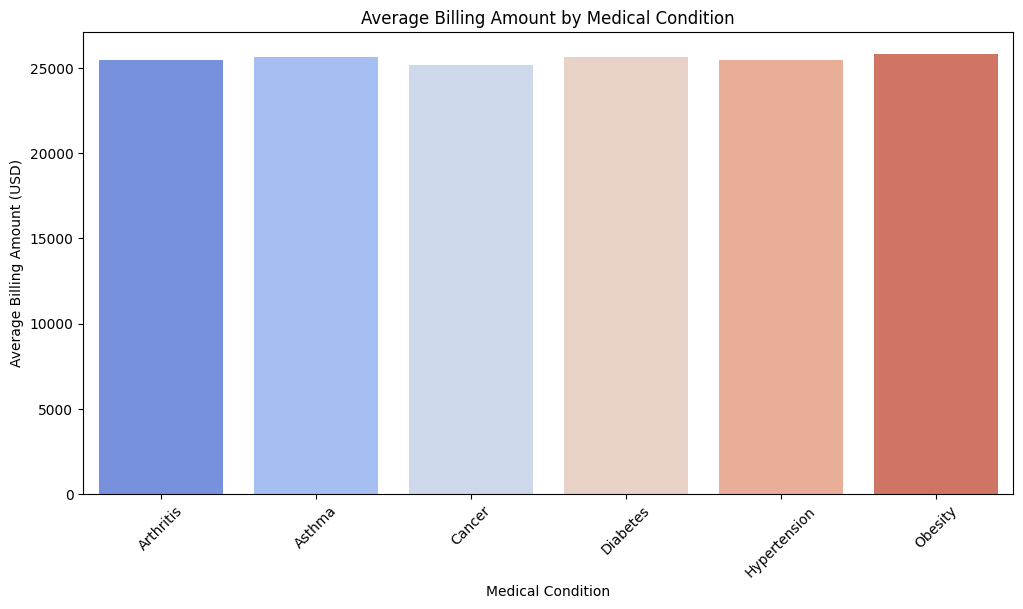

In [ ]:
# Average billing amount by Medical Condition
avg_billing_condition = df.groupby('Medical Condition')['Billing Amount'].mean().reset_index()

# Plot average billing amount by medical condition
plt.figure(figsize=(12, 6))
sns.barplot(x='Medical Condition', y='Billing Amount', data=avg_billing_condition, palette='coolwarm')
plt.title('Average Billing Amount by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Average Billing Amount (USD)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# ... (Your previous code for data loading, summary statistics, visualizations)

# Convert categorical variables to numerical
df['Gender_Encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Create dummy variables for 'Admission Type' and 'Blood Type'
admission_type_dummies = pd.get_dummies(df['Admission Type'], prefix='Admission_Type', drop_first=True)
blood_type_dummies = pd.get_dummies(df['Blood Type'], prefix='Blood_Type', drop_first=True)  # Encode Blood Type

# Concatenate dummy variables with the original DataFrame
df = pd.concat([df, admission_type_dummies, blood_type_dummies], axis=1)

# Features and target (Updated to include new dummy columns)
X = df[['Age', 'Gender_Encoded'] + list(admission_type_dummies.columns) + list(blood_type_dummies.columns)]  # Add Blood Type
y = df['Medical Condition']  # Assuming it's categorical and needs encoding

# Encode target variable
y_encoded = pd.factorize(y)[0]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation for training data
y_train_pred = rf_model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

# Predictions and evaluation for testing data
y_test_pred = rf_model.predict(X_test)
print("\nTesting Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.3203378378378378
Training Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.31      0.32      7356
           1       0.32      0.32      0.32      7374
           2       0.32      0.33      0.33      7482
           3       0.31      0.32      0.32      7338
           4       0.32      0.32      0.32      7457
           5       0.32      0.31      0.32      7393

    accuracy                           0.32     44400
   macro avg       0.32      0.32      0.32     44400
weighted avg       0.32      0.32      0.32     44400


Testing Accuracy: 0.17783783783783783
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.17      0.17      1871
           1       0.19      0.19      0.19      1857
           2       0.17      0.17      0.17      1822
           3       0.18      0.18      0.18      1847
           4       0.18      0.19      0.18 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Length of Stay
# Calculate Length of Stay
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%d-%m-%Y') # Change the format to match the actual format of your dates
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format='%d-%m-%Y') # Apply the same format to 'Date of Admission'
df['Length_of_Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Features and target
X = df[['Age', 'Billing Amount', 'Gender_Encoded']]
y = df['Length_of_Stay']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 74.4712197589404
R2 Score: -0.00025102508782359756


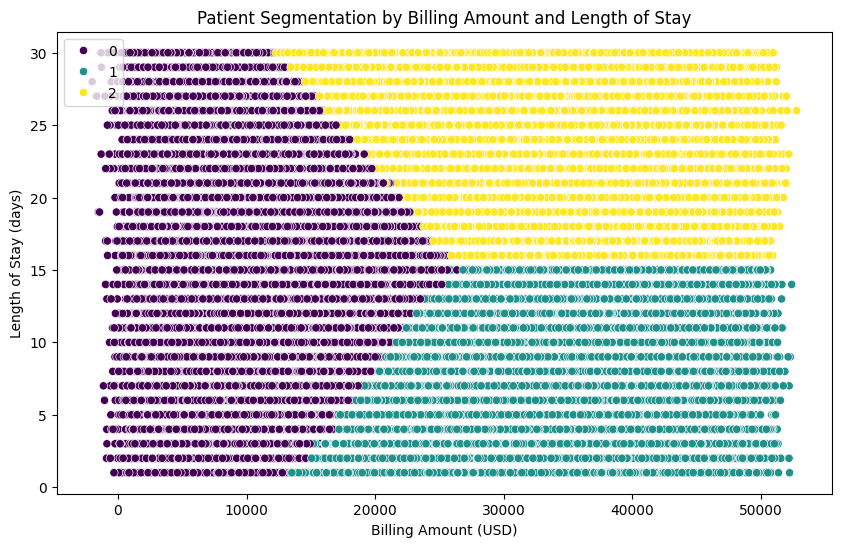

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['Age', 'Billing Amount', 'Length_of_Stay']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Billing Amount', y='Length_of_Stay', hue='Cluster', data=df, palette='viridis')
plt.title('Patient Segmentation by Billing Amount and Length of Stay')
plt.xlabel('Billing Amount (USD)')
plt.ylabel('Length of Stay (days)')
plt.legend()
plt.show()


In [ ]:
# Calculate readmission within 30 days
df['Readmission'] = (df['Discharge Date'] + pd.Timedelta(days=30)) >= df['Date of Admission'].shift(-1)
df['Readmission'] = df['Readmission'].fillna(False).astype(int)

# Features and target
X = df[['Age', 'Length_of_Stay', 'Billing Amount', 'Medical Condition']]
y = df['Readmission']

# Convert categorical variables
X = pd.get_dummies(X, columns=['Medical Condition'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.48      0.46      0.47      5260
           1       0.53      0.55      0.54      5840

    accuracy                           0.51     11100
   macro avg       0.51      0.51      0.51     11100
weighted avg       0.51      0.51      0.51     11100



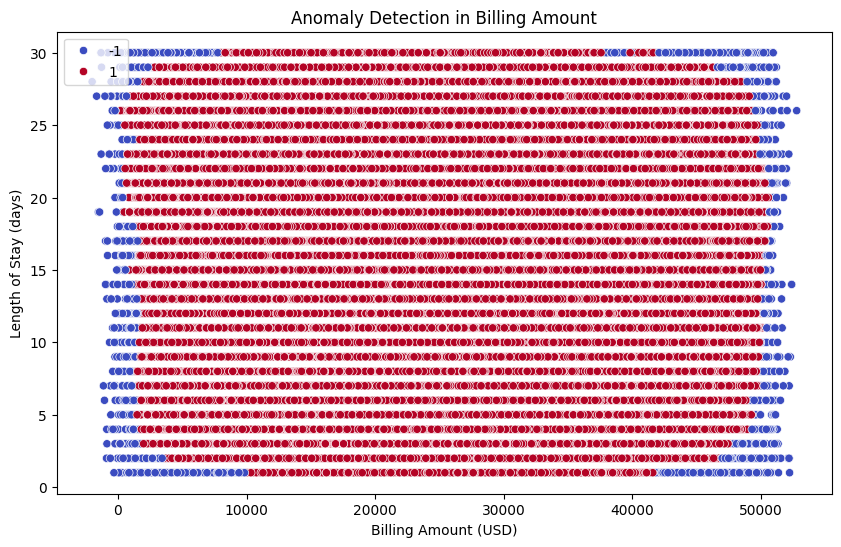

In [ ]:
from sklearn.ensemble import IsolationForest

# Features for anomaly detection
features = df[['Billing Amount', 'Length_of_Stay']]

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(features)

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Billing Amount', y='Length_of_Stay', hue='Anomaly', data=df, palette='coolwarm')
plt.title('Anomaly Detection in Billing Amount')
plt.xlabel('Billing Amount (USD)')
plt.ylabel('Length of Stay (days)')
plt.legend()
plt.show()


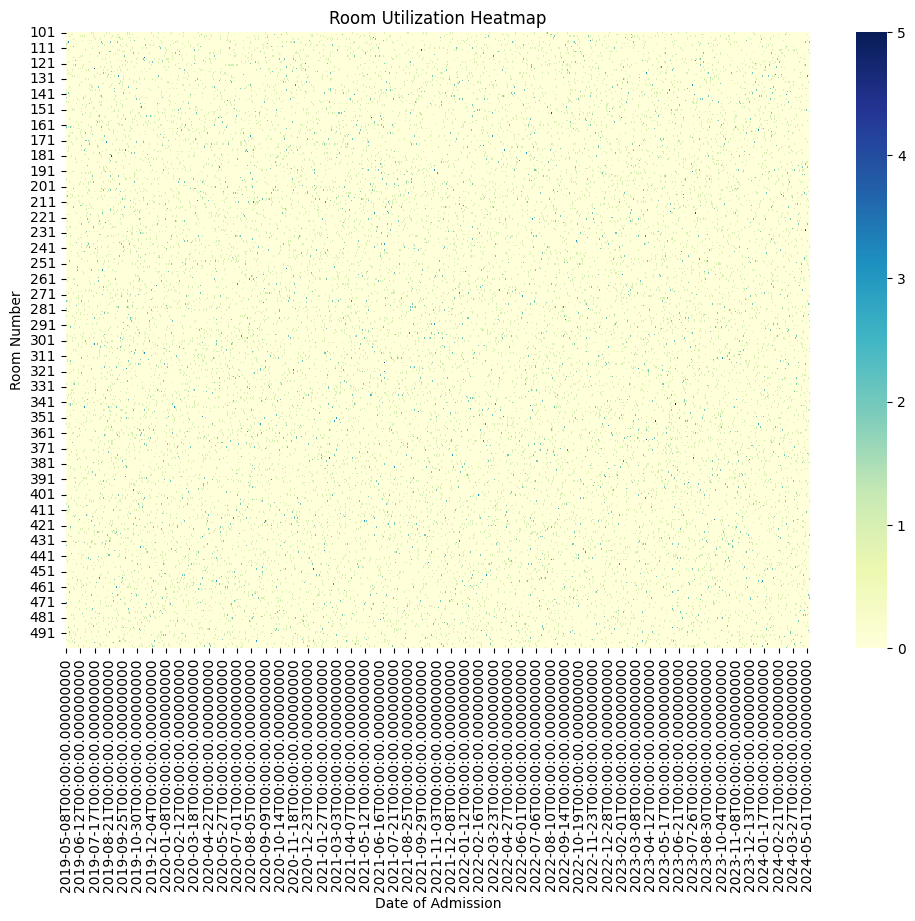

In [ ]:
# Room utilization over time
room_utilization = df.groupby(['Room Number', 'Date of Admission']).size().unstack(fill_value=0)

# Heatmap of room utilization
plt.figure(figsize=(12, 8))
sns.heatmap(room_utilization, cmap='YlGnBu', cbar=True)
plt.title('Room Utilization Heatmap')
plt.xlabel('Date of Admission')
plt.ylabel('Room Number')
plt.show()

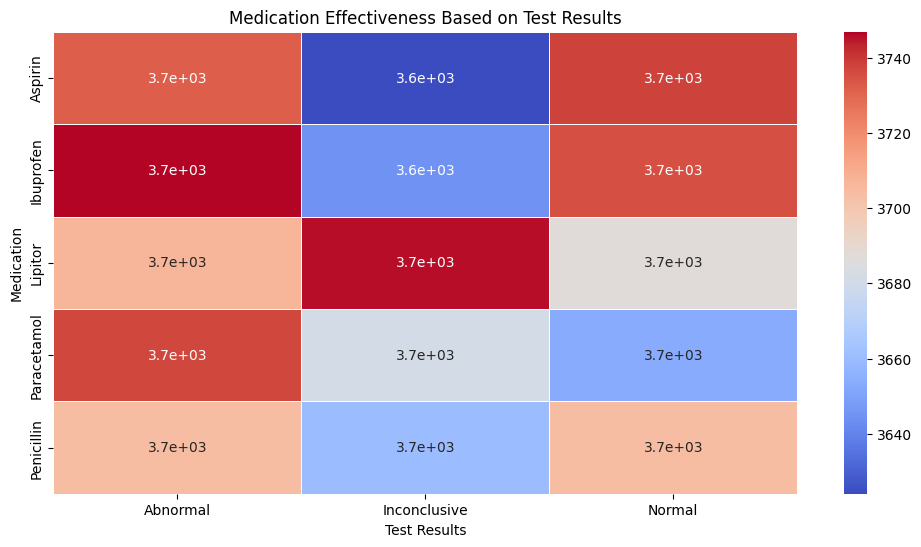

In [ ]:
# Group by Medication and Test Results
medication_effectiveness = df.groupby(['Medication', 'Test Results']).size().unstack(fill_value=0)

# Heatmap of medication effectiveness
plt.figure(figsize=(12, 6))
sns.heatmap(medication_effectiveness, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Medication Effectiveness Based on Test Results')
plt.xlabel('Test Results')
plt.ylabel('Medication')
plt.show()


In [ ]:
!pip install tensorflow
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder

# Example: Preparing dummy time-series data for condition progression
# Assuming a simplified scenario where each patient's condition evolves over several visits

# Generate synthetic sequential data for demonstration
df['Visit'] = df.groupby('Name').cumcount() + 1
df_pivot = df.pivot(index='Name', columns='Visit', values='Test Results').fillna(method='ffill')

# Prepare the data for LSTM
X = []
y = []
for name, row in df_pivot.iterrows():
    values = row.values
    # Convert values to numerical using Label Encoding
    encoder = LabelEncoder()
    values_encoded = encoder.fit_transform(values.astype(str)) # Convert to string type to handle NaNs

    for i in range(len(values_encoded) - 1):
        X.append(values_encoded[i:i+1])  # Input sequences
        y.append(values_encoded[i+1])    # Next value to predict

X = np.array(X).reshape(-1, 1, 1)
y = np.array(y)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=50, verbose=0)

# Make predictions
predictions = model.predict(X)


<ipython-input-23-70b391a26989>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivot = df.pivot(index='Name', columns='Visit', values='Test Results').fillna(method='ffill')
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

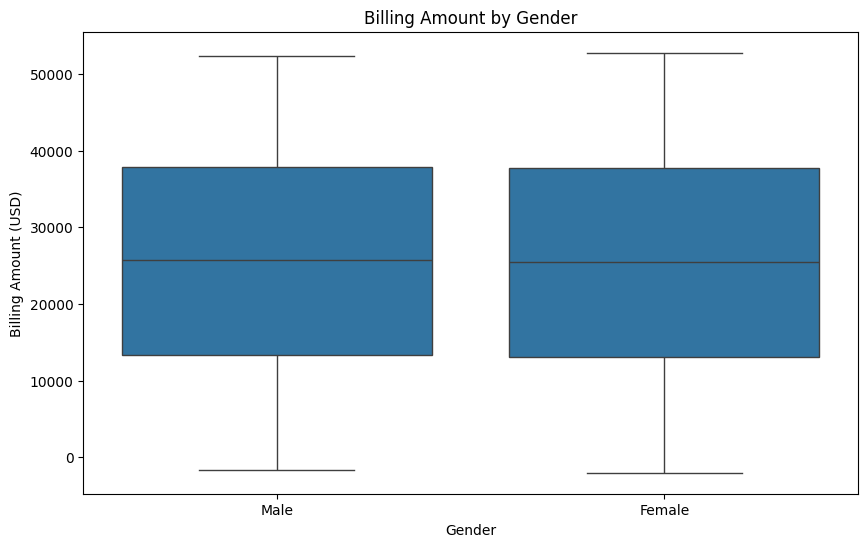

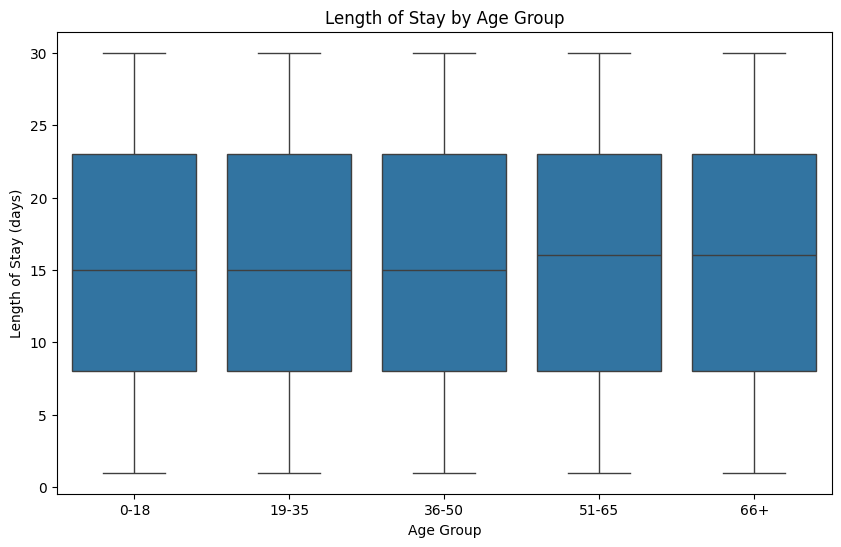

In [ ]:
# Box plot for Billing Amount by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Billing Amount', data=df)
plt.title('Billing Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Billing Amount (USD)')
plt.show()

# Compare Length of Stay across Age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='Length_of_Stay', data=df)
plt.title('Length of Stay by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Length of Stay (days)')
plt.show()


<ipython-input-21-d3938e43c4ab>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Doctor', y='Length_of_Stay', data=doctor_workload, palette='Blues_d')


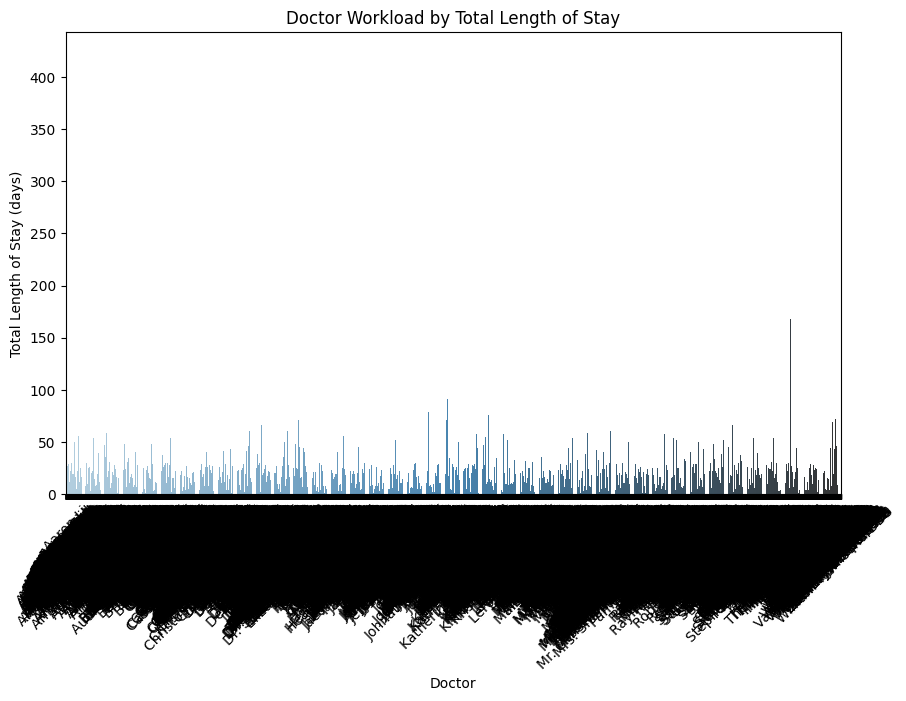

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with columns 'Doctor' and 'Length_of_Stay'

# Calculate doctor workload (total length of stay per doctor)
doctor_workload = df.groupby('Doctor')['Length_of_Stay'].sum().reset_index()

# Plot doctor workload
plt.figure(figsize=(10, 6))
sns.barplot(x='Doctor', y='Length_of_Stay', data=doctor_workload, palette='Blues_d')
plt.title('Doctor Workload by Total Length of Stay')
plt.xlabel('Doctor')
plt.ylabel('Total Length of Stay (days)')
plt.xticks(rotation=45)
plt.show()

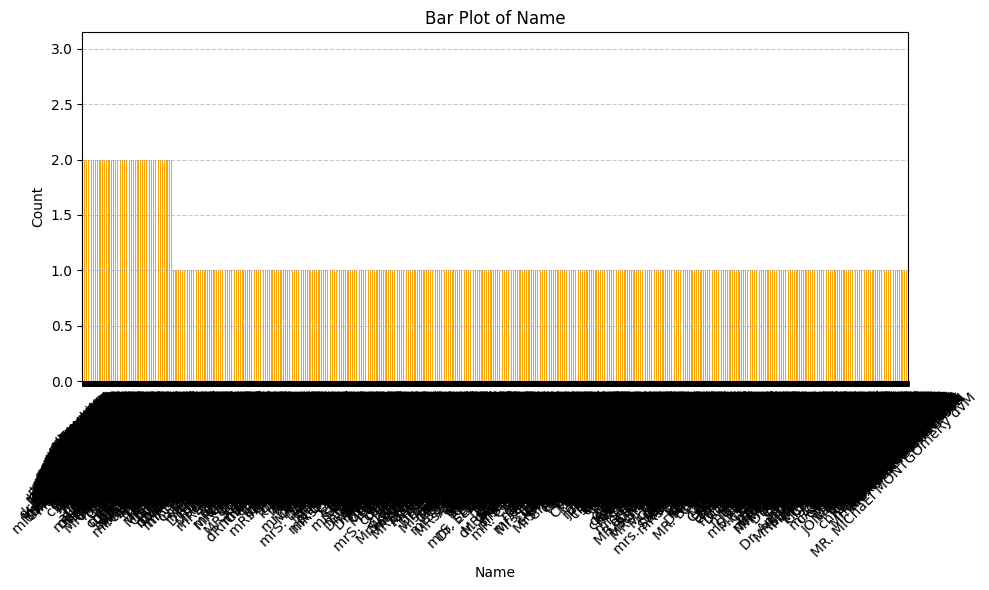

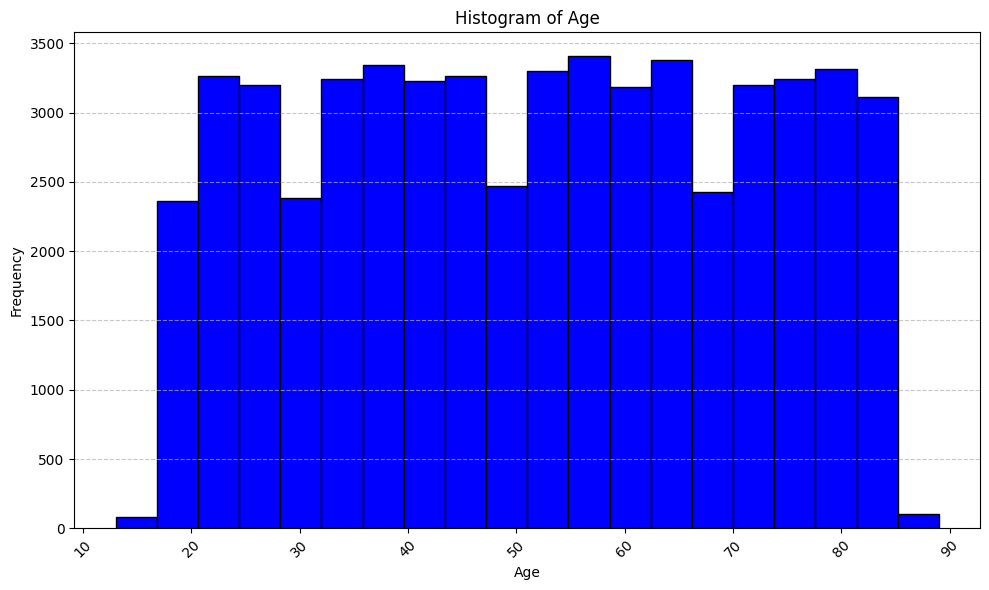

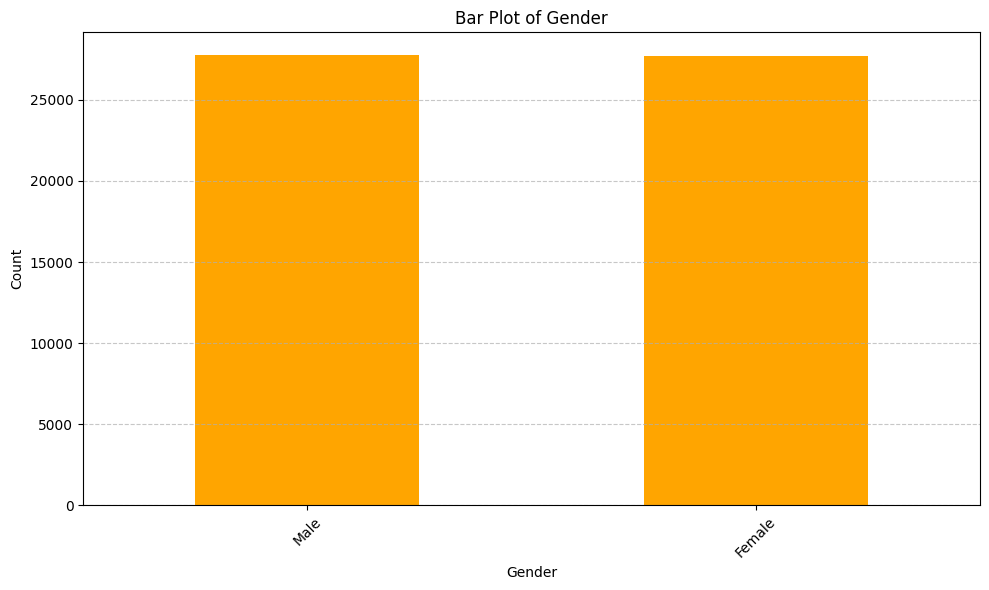

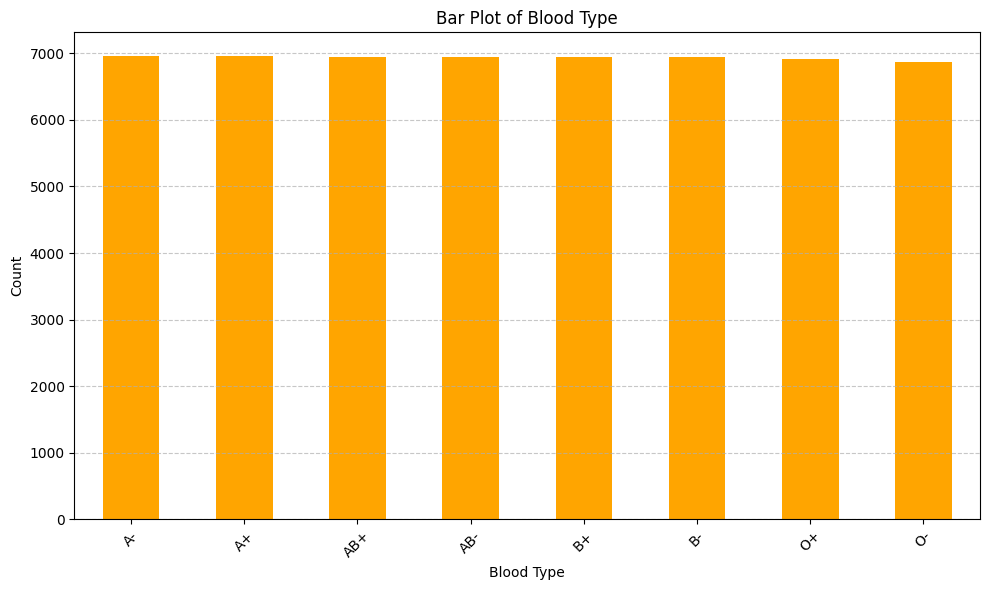

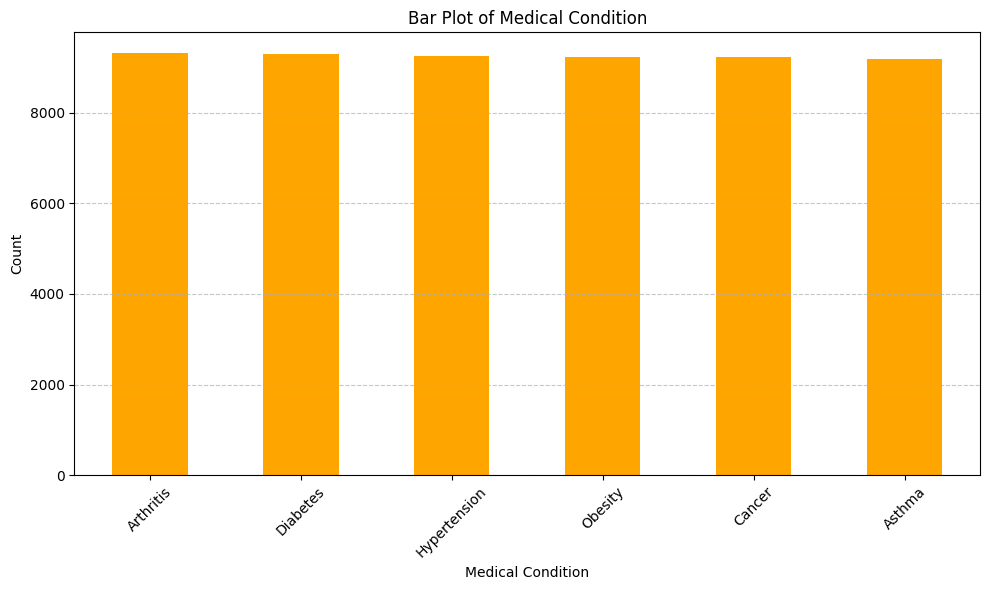

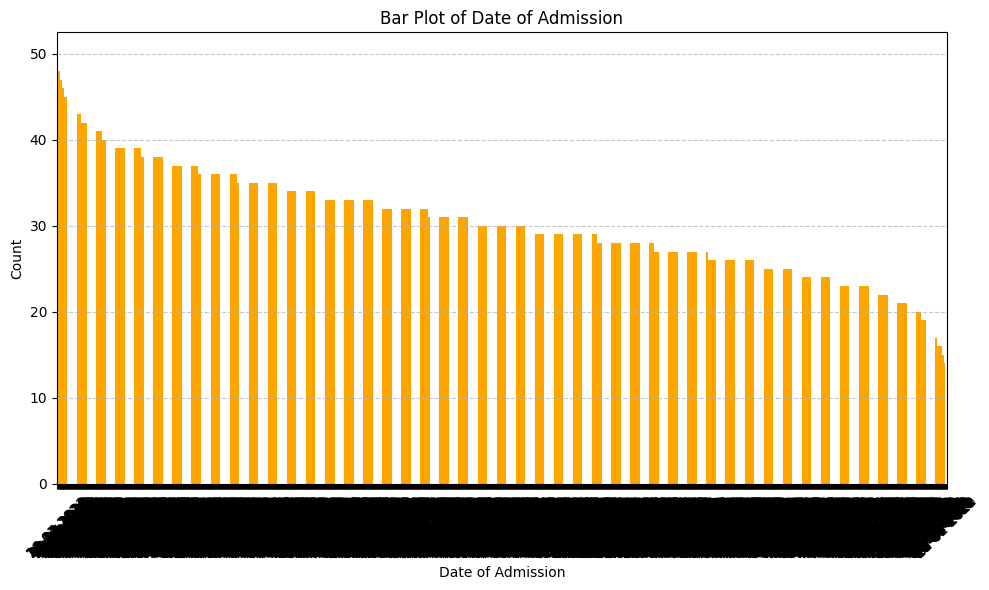

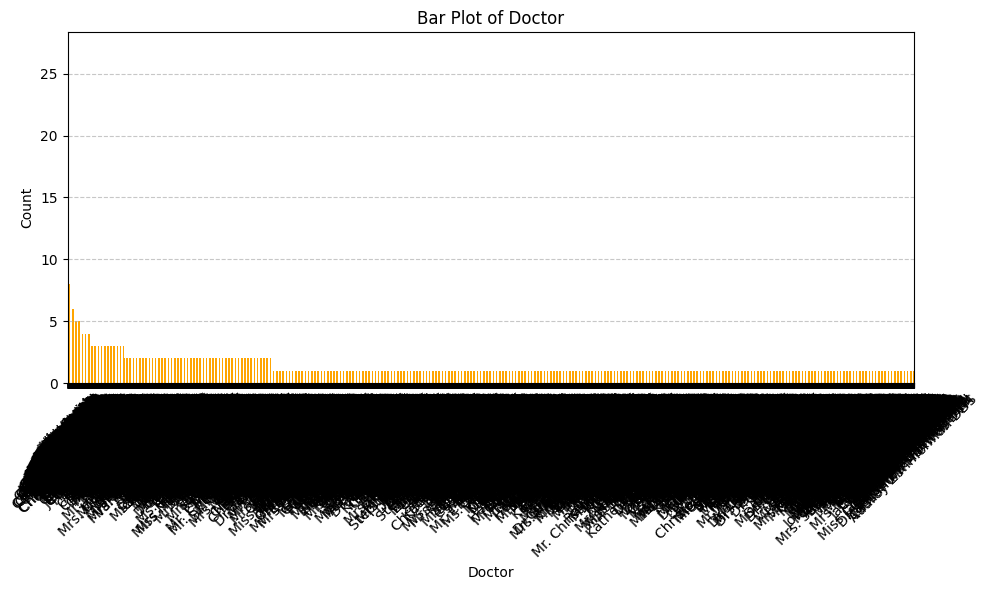

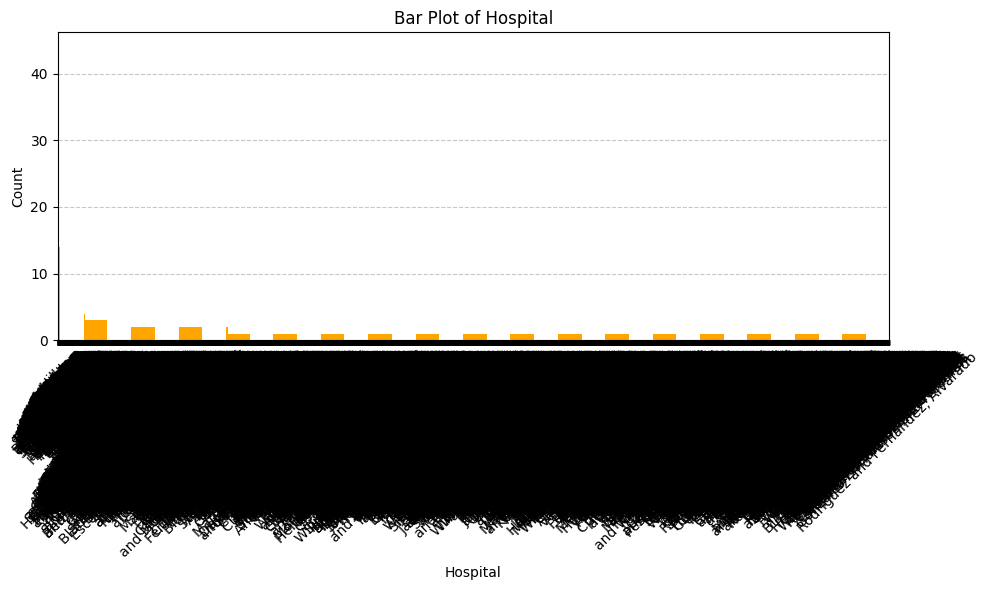

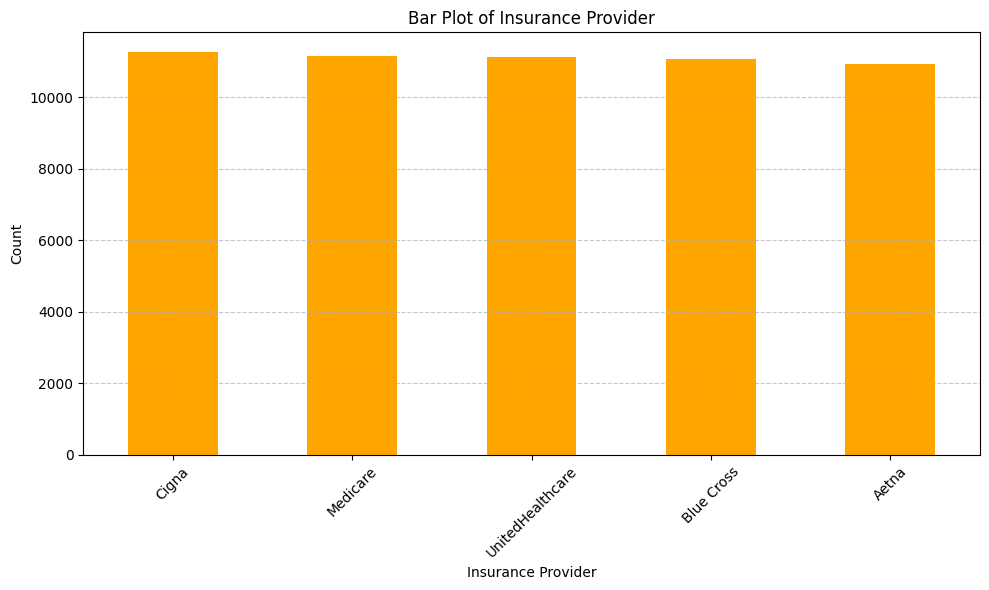

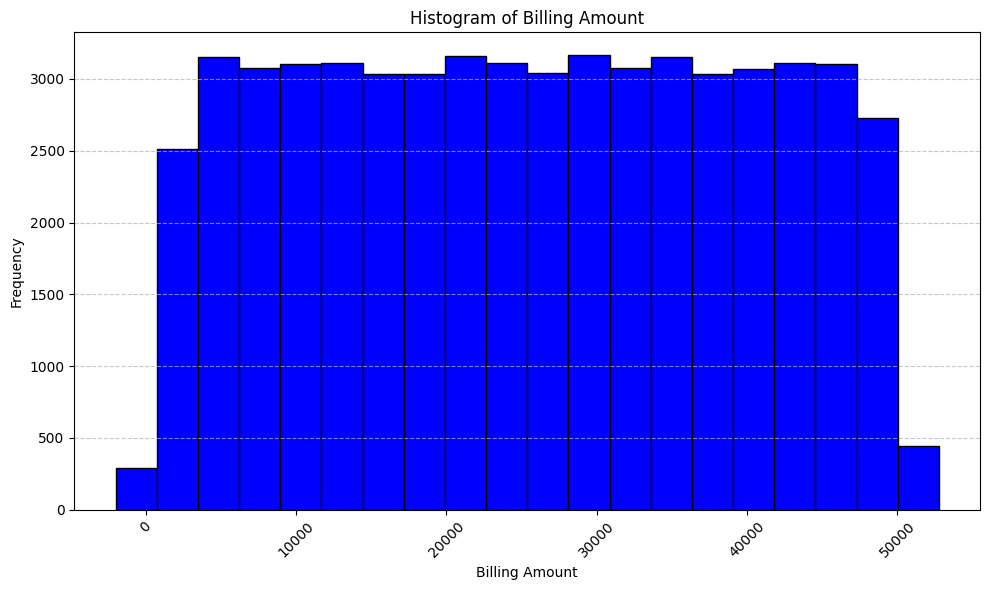

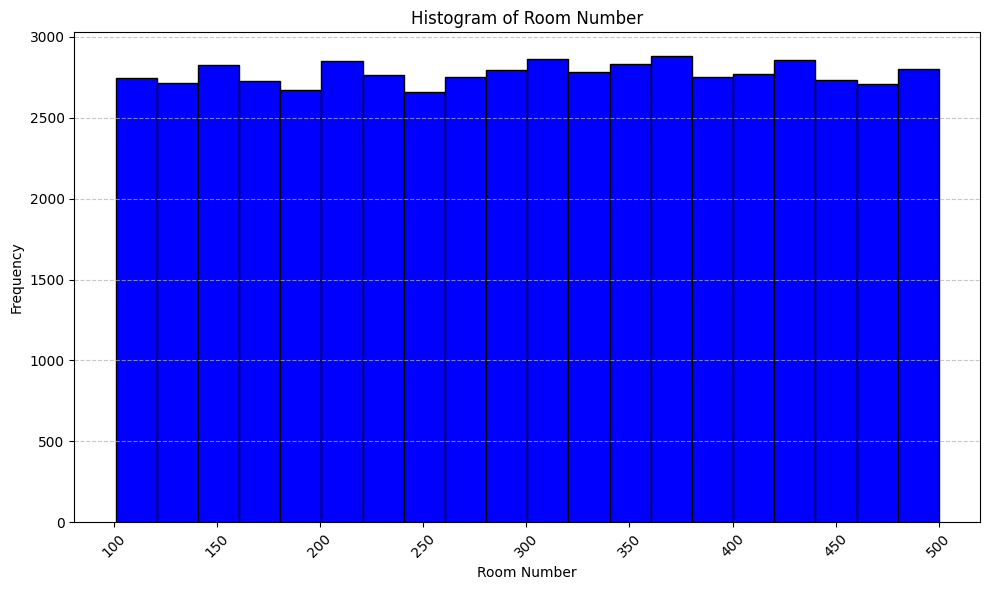

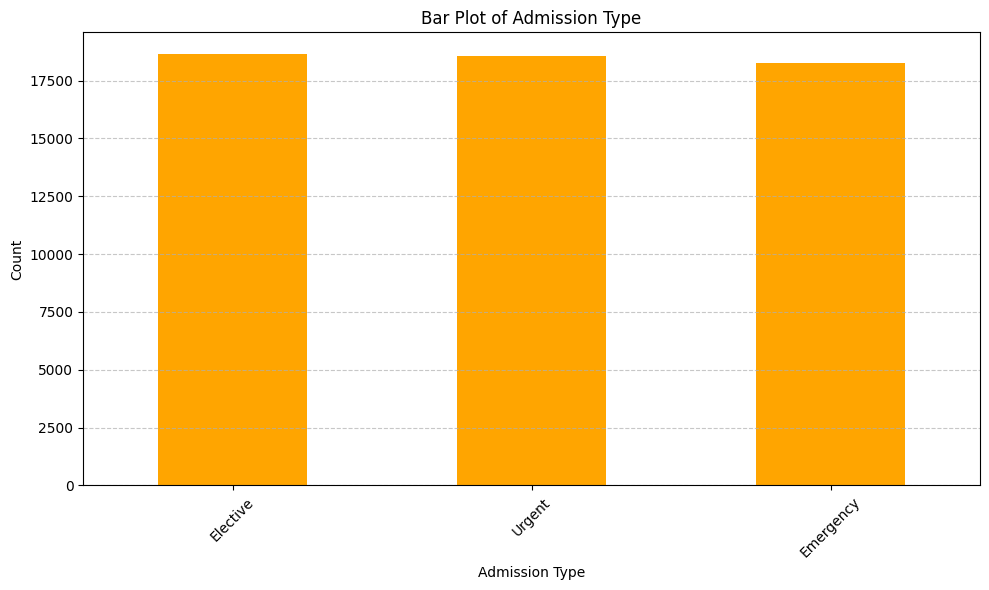

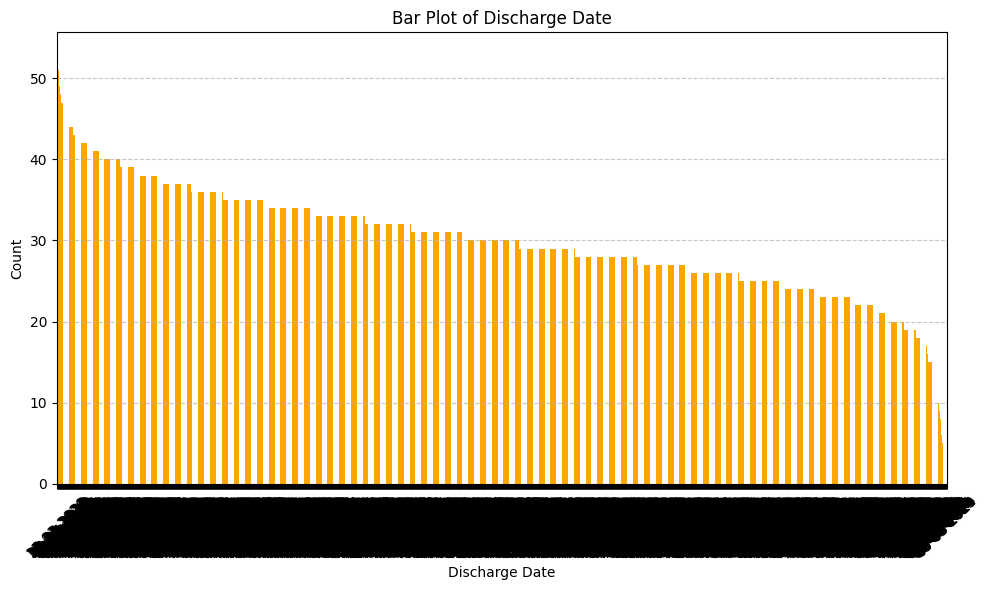

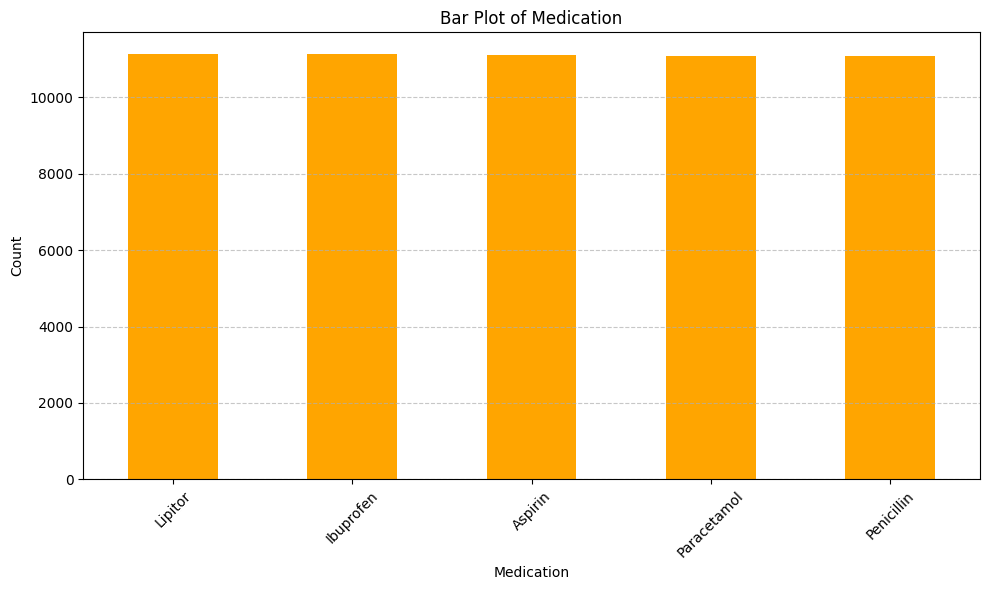

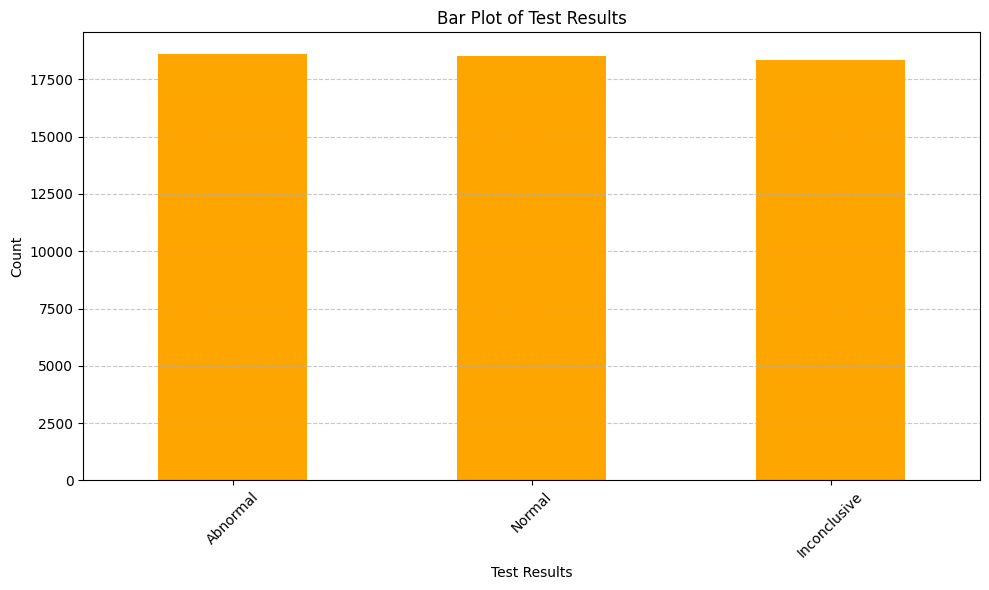

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Function to plot histograms for all columns
def plot_histograms(df):
    for column in df.columns:
        plt.figure(figsize=(10, 6))

        # Check if the column is numerical
        if pd.api.types.is_numeric_dtype(df[column]):
            plt.hist(df[column], bins=20, color='blue', edgecolor='black')
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
        else:
            # For categorical data, plot bar chart of value counts
            df[column].value_counts().plot(kind='bar', color='orange')
            plt.title(f'Bar Plot of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')

        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Call the function to plot histograms
plot_histograms(df)


<ipython-input-26-97db83620195>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Room Number', data=df_hospital, order=df_hospital['Room Number'].value_counts().index, palette='coolwarm')


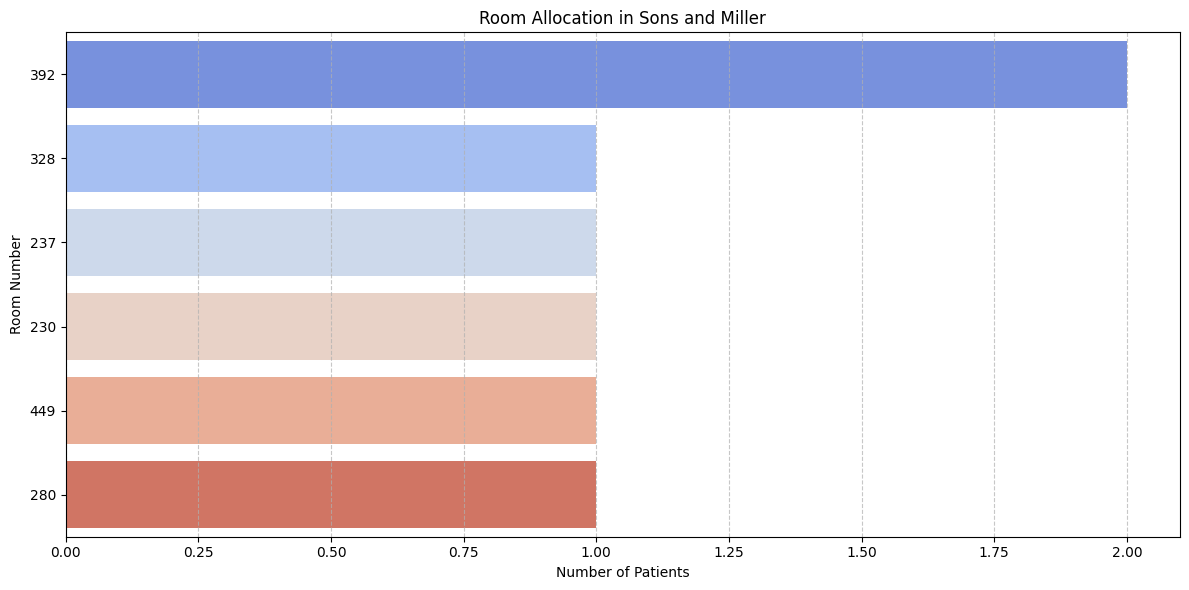

In [ ]:
# Filter dataset for a specific hospital
specific_hospital = 'Sons and Miller'
df_hospital = df[df['Hospital'] == specific_hospital]

# Plot room allocation
plt.figure(figsize=(12, 6))
sns.countplot(y='Room Number', data=df_hospital, order=df_hospital['Room Number'].value_counts().index, palette='coolwarm')
plt.title(f'Room Allocation in {specific_hospital}')
plt.xlabel('Number of Patients')
plt.ylabel('Room Number')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<ipython-input-28-4a7263dda2af>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  room_utilization = df_hospital.groupby(['Room Number', pd.to_datetime(df_hospital['Date of Admission']).dt.date]).size().unstack(fill_value=0) # Use df_hospital['Date of Admission'] and convert to datetime


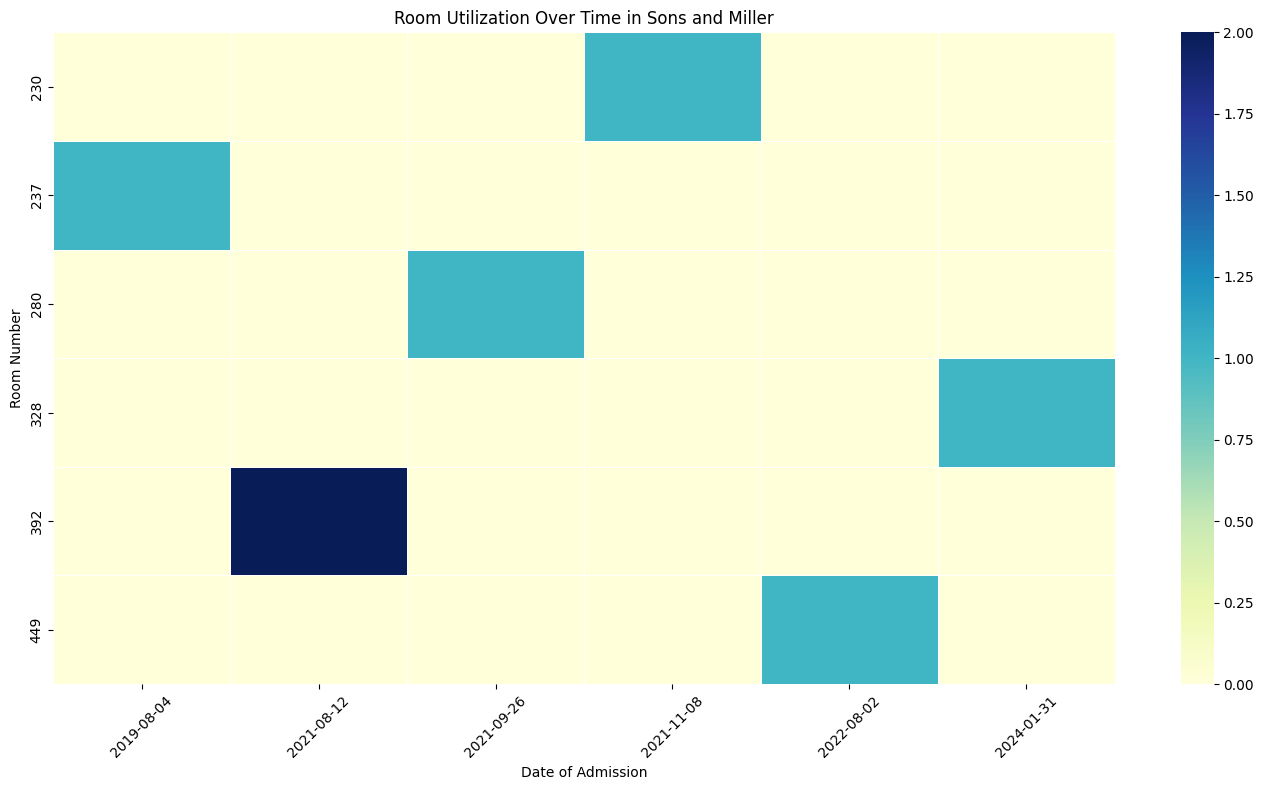

In [ ]:
# Group by room number and date for heatmap
room_utilization = df_hospital.groupby(['Room Number', pd.to_datetime(df_hospital['Date of Admission']).dt.date]).size().unstack(fill_value=0) # Use df_hospital['Date of Admission'] and convert to datetime

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(room_utilization, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title(f'Room Utilization Over Time in {specific_hospital}')
plt.xlabel('Date of Admission')
plt.ylabel('Room Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


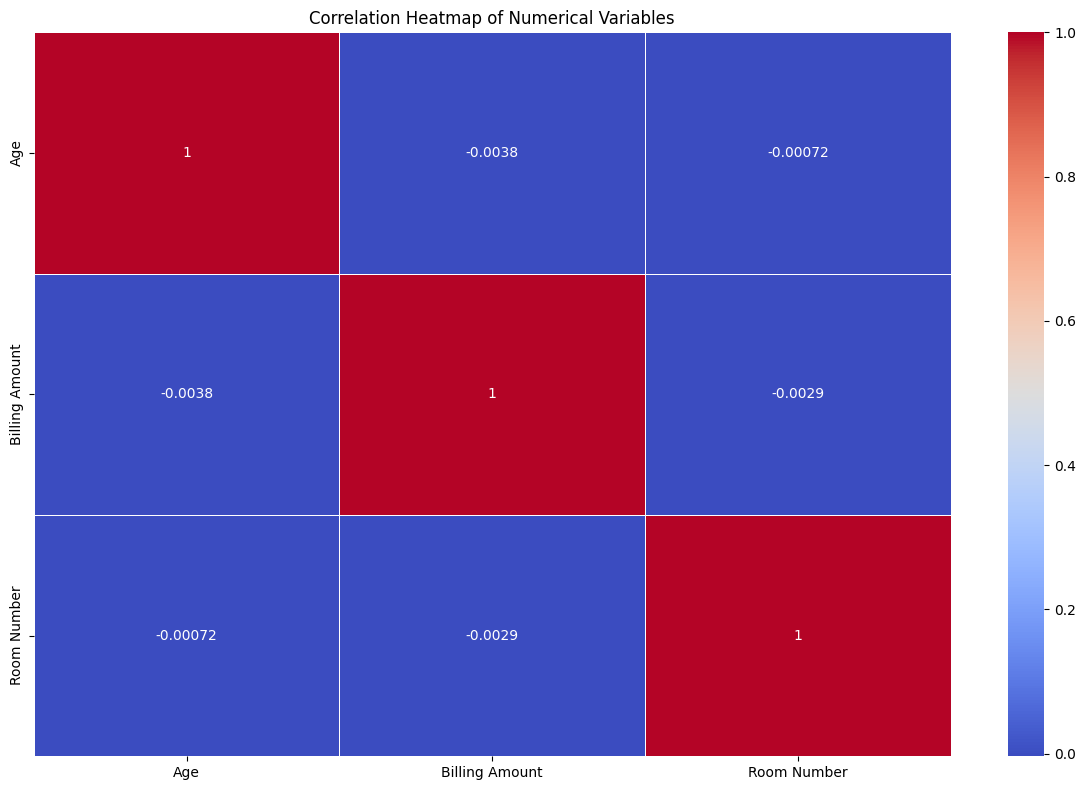

In [ ]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))

# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

<ipython-input-34-7f14398061cb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Billing Amount', y='Hospital', data=billing_by_hospital, palette='viridis')


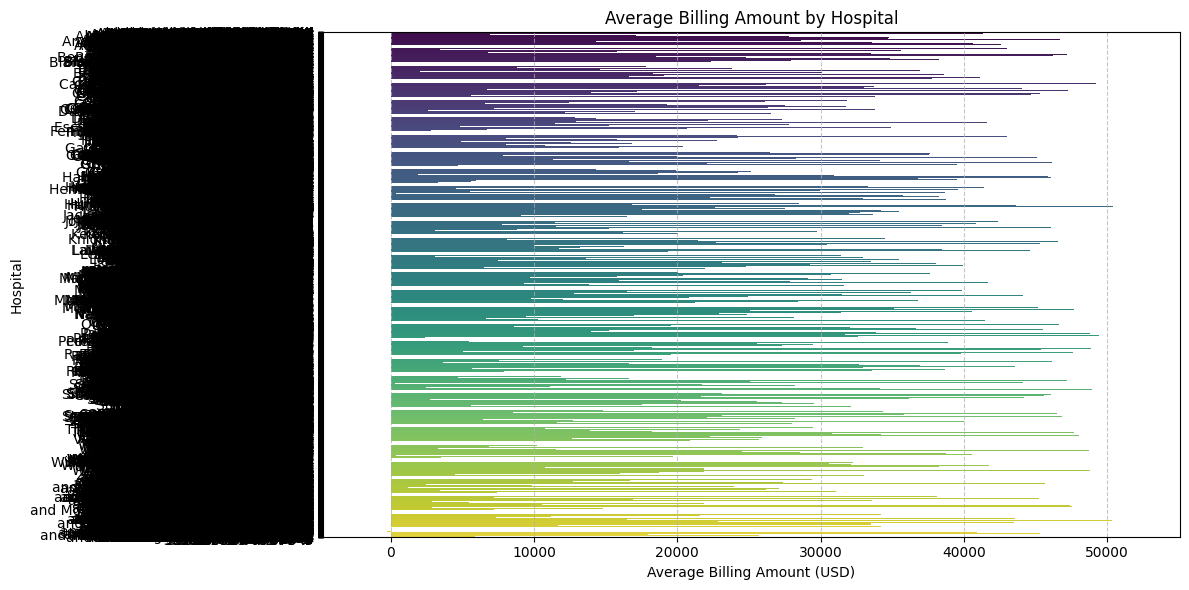

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Average billing amount by hospital
billing_by_hospital = df.groupby('Hospital')['Billing Amount'].mean().reset_index()

# Plot average billing amount by hospital
plt.figure(figsize=(12, 6))
sns.barplot(x='Billing Amount', y='Hospital', data=billing_by_hospital, palette='viridis')
plt.title('Average Billing Amount by Hospital')
plt.xlabel('Average Billing Amount (USD)')
plt.ylabel('Hospital')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Specify the hospital name
specific_hospital = 'Sons and Miller'  # Replace with the desired hospital name

# Filter the DataFrame for the specific hospital
hospital_data = df[df['Hospital'] == specific_hospital]

# Calculate the number of patients
num_patients = len(hospital_data)

# Print the result
print(f"Number of patients handled by {specific_hospital}: {num_patients}")

Number of patients handled by Sons and Miller: 7


<ipython-input-33-c07cbbb00e6e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hospital', y='Patient Count', data=hospital_patient_counts, palette='viridis')


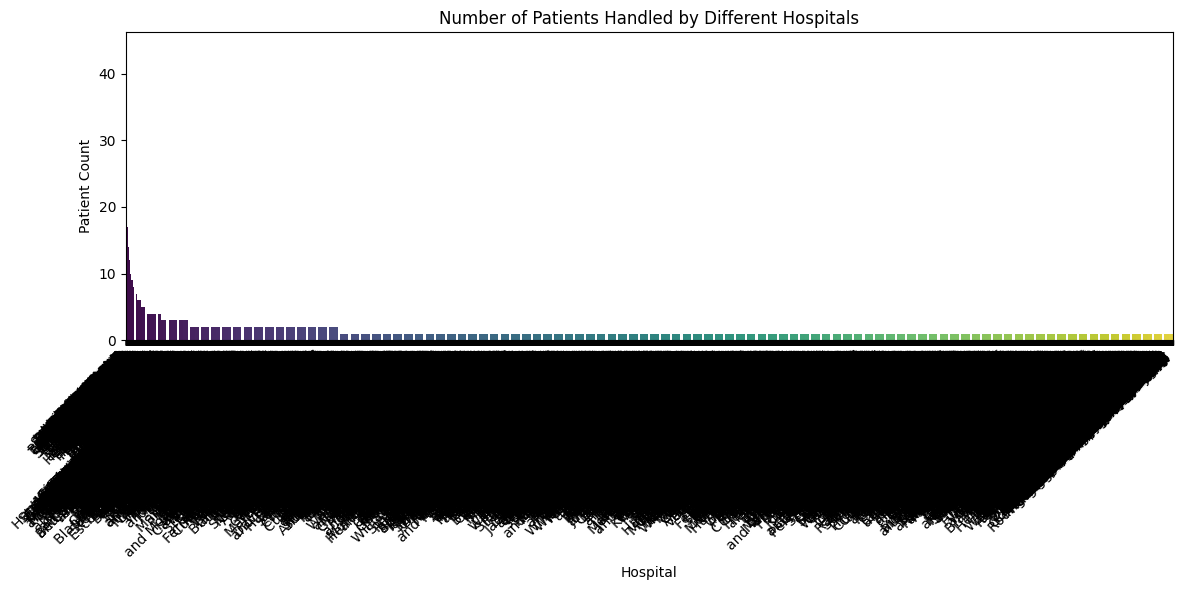

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Group by hospital and count patients
hospital_patient_counts = df['Hospital'].value_counts().reset_index()
hospital_patient_counts.columns = ['Hospital', 'Patient Count']

# Plotting using Seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='Hospital', y='Patient Count', data=hospital_patient_counts, palette='viridis')
plt.title('Number of Patients Handled by Different Hospitals')
plt.xlabel('Hospital')
plt.ylabel('Patient Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Calculate average and maximum billing amount per insurance provider
insurance_stats = df.groupby('Insurance Provider')['Billing Amount'].agg(['mean', 'max'])

# Find the insurance provider with the highest average billing amount
highest_avg_insurance = insurance_stats['mean'].idxmax()
highest_avg_amount = insurance_stats.loc[highest_avg_insurance, 'mean']
max_amount = insurance_stats.loc[highest_avg_insurance, 'max']  # Maximum for that provider

# Print the results
print(f"Insurance Provider with Highest Average Spending: {highest_avg_insurance}")
print(f"Highest Average Spending Amount: {highest_avg_amount}")
print(f"Maximum Spending Amount for this Provider: {max_amount}")

Insurance Provider with Highest Average Spending: Medicare
Highest Average Spending Amount: 25616.236531405775
Maximum Spending Amount for this Provider: 52092.6699


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Calculate total and count of billings per insurance provider
insurance_stats = df.groupby('Insurance Provider')['Billing Amount'].agg(['sum', 'count'])

# Calculate average total spending
insurance_stats['average_total_spending'] = insurance_stats['sum'] / insurance_stats['count']

# Sort by average total spending in descending order
highest_avg_total_spending = insurance_stats.sort_values(by='average_total_spending', ascending=False)

# Print the results
print("Insurance Providers with Highest Average Total Spending (Descending Order):")
print(highest_avg_total_spending[['average_total_spending']]) # Print only the average total spending column

Insurance Providers with Highest Average Total Spending (Descending Order):
                    average_total_spending
Insurance Provider                        
Medicare                      25616.236531
Blue Cross                    25613.804538
Aetna                         25553.812401
Cigna                         25525.874517
UnitedHealthcare              25389.172390


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Calculate total billing amount per insurance provider
insurance_total_billing = df.groupby('Insurance Provider')['Billing Amount'].sum()

# Sort by total billing amount in descending order
highest_total_spending = insurance_total_billing.sort_values(ascending=False)

# Print the results
print("Insurance Providers with Highest Total Spending (Descending Order):")
print(highest_total_spending)

Insurance Providers with Highest Total Spending (Descending Order):
Insurance Provider
Cigna               2.871406e+08
Medicare            2.857235e+08
Blue Cross          2.832631e+08
UnitedHealthcare    2.824545e+08
Aetna               2.788688e+08
Name: Billing Amount, dtype: float64


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Group by insurance provider and find the maximum billing amount for each
highest_individual_spending = df.groupby('Insurance Provider')['Billing Amount'].max().sort_values(ascending=False)

# Print the results
print("Insurance Providers with Highest Individual Spending (Descending Order):")
print(highest_individual_spending)

Insurance Providers with Highest Individual Spending (Descending Order):
Insurance Provider
Blue Cross          52764.27674
UnitedHealthcare    52373.03237
Aetna               52211.85297
Cigna               52170.03685
Medicare            52092.66990
Name: Billing Amount, dtype: float64


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Group by doctor and count the number of patients
doctor_patient_counts = df['Doctor'].value_counts().head(10)

# Print the results
print("Top 10 Doctors Who Handled the Most Patients:")
print(doctor_patient_counts)

Top 10 Doctors Who Handled the Most Patients:
Doctor
Michael Smith        27
Robert Smith         22
John Smith           22
Michael Johnson      20
James Smith          20
Robert Johnson       19
David Smith          19
Michael Williams     18
Matthew Smith        17
Christopher Smith    17
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Group by patient and sum their billing amounts
patient_total_billing = df.groupby('Name')['Billing Amount'].sum()

# Sort in descending order and get the top 10
top_10_patients = patient_total_billing.sort_values(ascending=False).head(10)

# Print the results
print("Top 10 Patients with Highest Total Billing Amount:")
print(top_10_patients)

Top 10 Patients with Highest Total Billing Amount:
Name
kARen klInE         104746.06474
LAuRie hOod         104340.07370
pAmElA NoRmAn       103951.93628
Erin HaNSen         102863.95436
GaBRIel hARris      102561.98590
SaMUEl LEwIs        102400.32064
KimBeRLy huGHEs     102173.31748
BriAn weLLs         102151.04198
luKE THoMAS         102034.65048
JONAthaN sANDeRs    101874.50066
Name: Billing Amount, dtype: float64


In [45]:
import pandas as pd

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Group by name, age, and gender, then get unique admission dates
multiple_admissions = df.groupby(['Name', 'Age', 'Gender'])['Date of Admission'].nunique().reset_index(name='UniqueAdmissionDates')

# Filter for patients with more than one unique admission date
multiple_admissions = multiple_admissions[multiple_admissions['UniqueAdmissionDates'] > 1]

# Print the results
print("Patients with Multiple Admissions (verified by Name, Age, Gender, and Different Admission Dates):")
print(multiple_admissions)

Patients with Multiple Admissions (verified by Name, Age, Gender, and Different Admission Dates):
Empty DataFrame
Columns: [Name, Age, Gender, UniqueAdmissionDates]
Index: []


In [43]:
import pandas as pd

# Load the dataset
df = pd.read_csv('healthcare_dataset.csv')

# Group by hospital and count patients
hospital_patient_counts = df['Hospital'].value_counts().head(10)

# Print the results
print("Top 10 Busiest Hospitals (by Patient Count):")
print(hospital_patient_counts)

Top 10 Busiest Hospitals (by Patient Count):
Hospital
LLC Smith      44
Ltd Smith      39
Johnson PLC    38
Smith Ltd      37
Smith PLC      36
Smith Group    36
Johnson Inc    35
Smith Inc      34
Smith LLC      32
Group Smith    32
Name: count, dtype: int64
